In [1]:
from glob import glob
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Utils

def plot_confusion_matrix(cm, classes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=15, pad=20)
    plt.xlabel('Prediction', fontsize=11)
    plt.ylabel('Actual', fontsize=11)

    # Customizations
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()


def train_test(classifier, X_train, X_test, y_train, y_test, classes):

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    classification_rep = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    

    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:\n", classification_rep)

    # Display confusion matrix
    plot_confusion_matrix(cm, classes)


In [3]:
datasets =  glob("./processed_datasets/*.csv")
for dataset in datasets:
    print(dataset)


./processed_datasets/dataset_preprocessed_smote.csv
./processed_datasets/dataset_preprocessed_adasyn.csv


# Raw Data

dataset_preprocessed_smote
Random Forest Classifier
Accuracy: 0.9411
F1-score: 0.9411
Precision: 0.9415
Recall: 0.9410

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4344
         1.0       0.95      0.93      0.94      4284

    accuracy                           0.94      8628
   macro avg       0.94      0.94      0.94      8628
weighted avg       0.94      0.94      0.94      8628



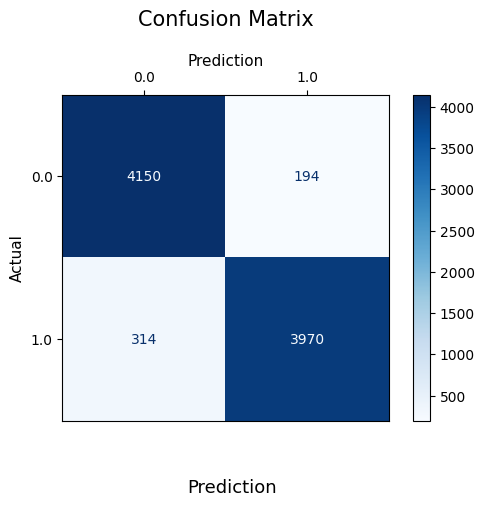

SVM Classifier
Accuracy: 0.9411
F1-score: 0.9411
Precision: 0.9415
Recall: 0.9410

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4344
         1.0       0.95      0.93      0.94      4284

    accuracy                           0.94      8628
   macro avg       0.94      0.94      0.94      8628
weighted avg       0.94      0.94      0.94      8628



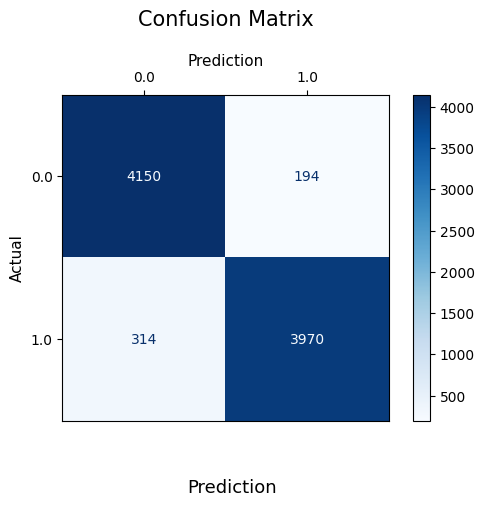


--------------------------------

dataset_preprocessed_adasyn
Random Forest Classifier
Accuracy: 0.9415
F1-score: 0.9415
Precision: 0.9420
Recall: 0.9414

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4351
         1.0       0.95      0.93      0.94      4285

    accuracy                           0.94      8636
   macro avg       0.94      0.94      0.94      8636
weighted avg       0.94      0.94      0.94      8636



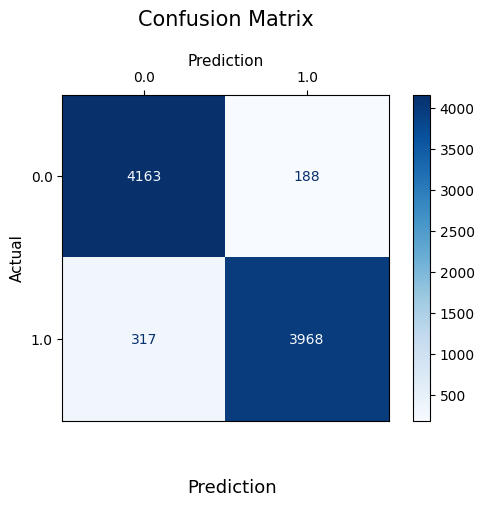

SVM Classifier
Accuracy: 0.9415
F1-score: 0.9415
Precision: 0.9420
Recall: 0.9414

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4351
         1.0       0.95      0.93      0.94      4285

    accuracy                           0.94      8636
   macro avg       0.94      0.94      0.94      8636
weighted avg       0.94      0.94      0.94      8636



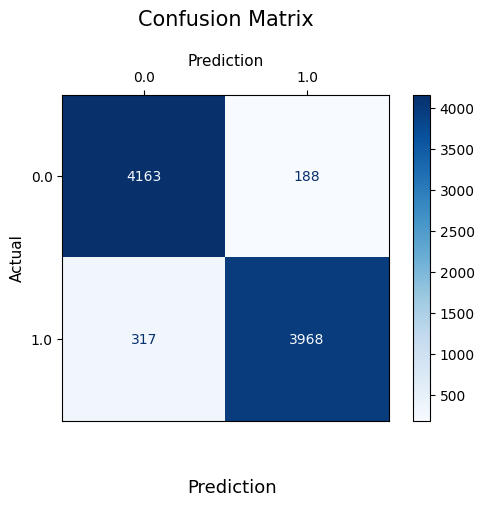


--------------------------------



In [4]:

for dataset in datasets:
    print(dataset.split("/")[-1].strip(".csv"))
    # read the dataset
    df = pd.read_csv(dataset)
    # Split the data into train and test

    target_column = "Gestational Diabetes"

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    classes = df[target_column].unique()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Classifier
    print("Random Forest Classifier")
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    train_test(rf_classifier, X_train, X_test, y_train, y_test, classes)
    
    # SVM Classifier
    print("SVM Classifier")
    rbf = SVC(kernel='rbf', gamma=0.5, C=0.1, class_weight='balanced')
    train_test(rf_classifier, X_train, X_test, y_train, y_test, classes)
    print("\n--------------------------------\n")